# Renewable Energy Trends Analysis

## Objectives
The primary objective of this analysis is to evaluate the trends and growth potential of different renewable energy sources over the last decade, with a focus on solar and wind energy.

## Central Hypothesis
Solar and wind energy have shown the most significant growth among renewable energy sources over the past decade.

## Key Questions
1. What are the growth trends for solar and wind energy compared to other renewable sources like hydro and bioenergy over the past decade? This helps to identify which energy sources are expanding the fastest.
2. Which regions or countries have seen the most significant increase in solar and wind energy production? Understanding geographical trends can highlight areas of rapid adoption or potential markets for further expansion.
3. What is the correlation between renewable energy growth and government incentives or policies in these regions? This will help assess the impact of policy on renewable energy growth, supporting or refuting part of the hypothesis regarding policy influence.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Set the aesthetics for seaborn plots
sns.set(style="whitegrid")

# Optional: Increase the default figure size for matplotlib plots
plt.rcParams['figure.figsize'] = [10, 6]

warnings.simplefilter(action='ignore', category=FutureWarning)

In [16]:
# Load the dataset from the Global Power Plant Database to inspect its structure and initial data
data_path = 'global_power_plant_database.csv'
global_power_data = pd.read_csv(data_path, low_memory=False)

# Display the first few rows and some general information about the dataset
global_power_data.head(), global_power_data.info(), global_power_data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34936 entries, 0 to 34935
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         34936 non-null  object 
 1   country_long                    34936 non-null  object 
 2   name                            34936 non-null  object 
 3   gppd_idnr                       34936 non-null  object 
 4   capacity_mw                     34936 non-null  float64
 5   latitude                        34936 non-null  float64
 6   longitude                       34936 non-null  float64
 7   primary_fuel                    34936 non-null  object 
 8   other_fuel1                     1944 non-null   object 
 9   other_fuel2                     276 non-null    object 
 10  other_fuel3                     92 non-null     object 
 11  commissioning_year              17447 non-null  float64
 12  owner                           

(  country country_long                                              name  \
 0     AFG  Afghanistan      Kajaki Hydroelectric Power Plant Afghanistan   
 1     AFG  Afghanistan                                      Kandahar DOG   
 2     AFG  Afghanistan                                      Kandahar JOL   
 3     AFG  Afghanistan     Mahipar Hydroelectric Power Plant Afghanistan   
 4     AFG  Afghanistan  Naghlu Dam Hydroelectric Power Plant Afghanistan   
 
       gppd_idnr  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
 0  GEODB0040538         33.0    32.322    65.1190        Hydro         NaN   
 1    WKS0070144         10.0    31.670    65.7950        Solar         NaN   
 2    WKS0071196         10.0    31.623    65.7920        Solar         NaN   
 3  GEODB0040541         66.0    34.556    69.4787        Hydro         NaN   
 4  GEODB0040534        100.0    34.641    69.7170        Hydro         NaN   
 
   other_fuel2  ... estimated_generation_gwh_2013  \
 0     

# Global Power Plant Database Analysis

The dataset from the Global Power Plant Database includes extensive details on 34,936 power plants, structured across 36 columns. Here's a breakdown of key columns that are most relevant to our analysis:

- **country, country_long**: Country code and full country name.
- **name**: Name of the power plant.
- **capacity_mw**: Power plant capacity in megawatts.
- **latitude, longitude**: Geographical coordinates.
- **primary_fuel**: Primary energy source for the power plant (e.g., Solar, Wind, Hydro).
- **other_fuel1, other_fuel2, other_fuel3**: Secondary or tertiary energy sources.
- **commissioning_year**: Year the power plant was commissioned.
- **generation_gwh_2013 to generation_gwh_2019**: Annual electricity generation in gigawatt hours for specific years.
- **estimated_generation_gwh_[year]**: Estimated generation values for each year.

## Key Observations:

- Data includes geographic details, which can be useful for mapping and regional analysis.
- Power generation data is split between actual and estimated, which might affect how we handle analysis depending on availability and reliability.
- There's a substantial amount of missing data in several columns, especially in the annual generation columns and commissioning year.

## Next Steps for Data Wrangling:

1. **Handle Missing Values**: Decide how to manage missing values, especially in the generation and commissioning year columns.
2. **Filter Relevant Data**: Since we're interested in renewable energy trends, filter the dataset to include only renewable energy sources like solar, wind, hydro, and bioenergy.
3. **Data Consistency**: Ensure consistent data, particularly in handling various fuel types and merging similar categories if necessary.


In [28]:
def impute_with_median(group):
  # Check if there are any non-NaN values
  if group.notna().any():
    return group.fillna(group.median())
  else:
    # Return a constant value (e.g., 0) or np.nan to indicate no data
    return 0  # Or np.nan

# Filter for renewable sources
renewable_sources = ['Solar', 'Wind', 'Hydro', 'Biomass', 'Geothermal', 'Wave and Tidal']
filtered_renewable_data = global_power_data[global_power_data['primary_fuel'].isin(renewable_sources)].copy()

# Impute missing values in generation columns using group-wise median
for column in filtered_renewable_data.columns:
  if 'generation_gwh_' in column:
    filtered_renewable_data.loc[:, column] = filtered_renewable_data.groupby('primary_fuel')[column].transform(impute_with_median)

# Examine the cleaned data (assuming you want to see the first few rows)
print(filtered_renewable_data.head())

  country country_long                                              name  \
0     AFG  Afghanistan      Kajaki Hydroelectric Power Plant Afghanistan   
1     AFG  Afghanistan                                      Kandahar DOG   
2     AFG  Afghanistan                                      Kandahar JOL   
3     AFG  Afghanistan     Mahipar Hydroelectric Power Plant Afghanistan   
4     AFG  Afghanistan  Naghlu Dam Hydroelectric Power Plant Afghanistan   

      gppd_idnr  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0  GEODB0040538         33.0    32.322    65.1190        Hydro         NaN   
1    WKS0070144         10.0    31.670    65.7950        Solar         NaN   
2    WKS0071196         10.0    31.623    65.7920        Solar         NaN   
3  GEODB0040541         66.0    34.556    69.4787        Hydro         NaN   
4  GEODB0040534        100.0    34.641    69.7170        Hydro         NaN   

  other_fuel2  ... estimated_generation_gwh_2013  \
0         NaN  ...    

# Renewable Energy Data Filtering and Observations

The dataset has been filtered to include only renewable energy sources like Solar, Wind, Hydro, Biomass, Geothermal, and Wave and Tidal. Here's what we've done and some key observations from the cleaned data:

## Cleaning Steps:

- **Filtered for Renewable Sources**: The dataset now includes only plants that use renewable energy sources.
- **Handled Missing Values**: Missing values in the generation data columns have been filled with the median values for each primary fuel type, ensuring there are no missing generation values for our analysis.

## Current Data State:

- The filtered dataset contains entries for 3,004 renewable energy plants.
- All generation data columns from 2013 to 2017 have been filled with median values where data was missing, ensuring completeness for trend analysis.

## Data Columns Overview:

- **capacity_mw**: Plant capacity.
- **primary_fuel**: Type of renewable energy.
- **generation_gwh_[year]**: Actual and estimated generation data for specific years.
- **estimated_generation_note_[year]**: Notes on how the generation estimates were calculated.


C:\Users\afnan\AppData\Local\Temp\ipykernel_14516\2109917767.py:15: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.lineplot(data=annual_generation_by_fuel.T, dashes=False, palette=pastel_colors)


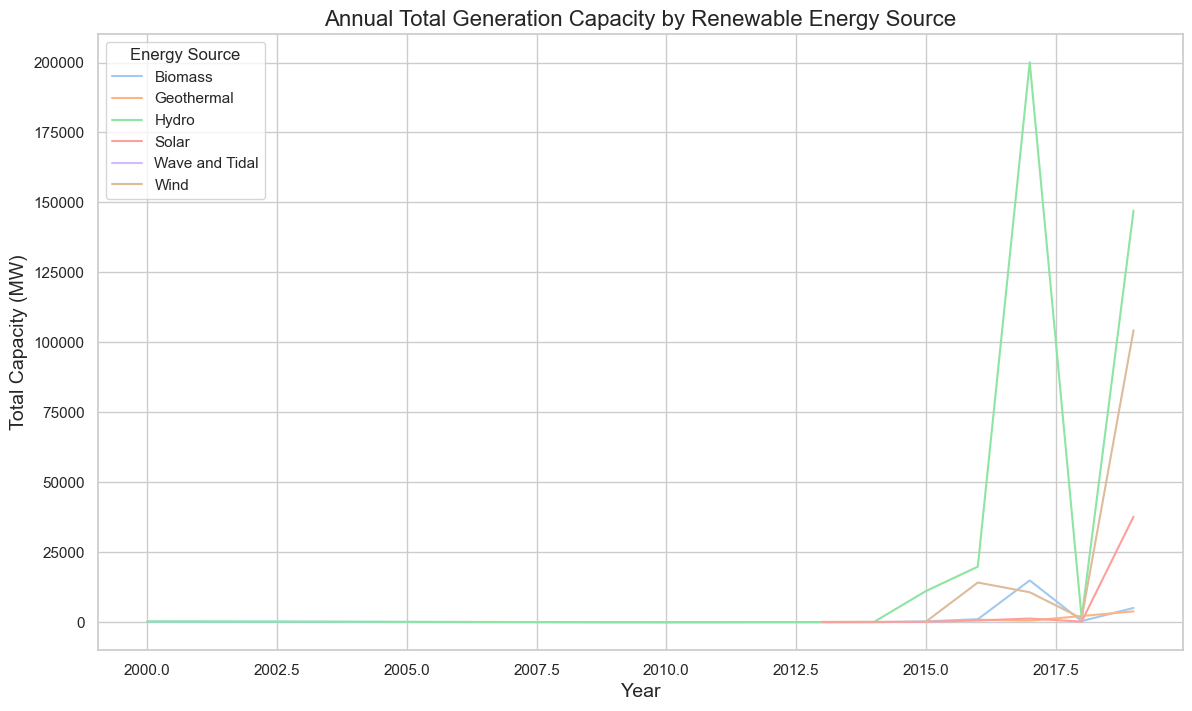

In [35]:
# Step 1: Growth Trends Analysis

# Create a DataFrame for annual total generation by fuel type
annual_generation_by_fuel = filtered_renewable_data.groupby(['primary_fuel', 'year_of_capacity_data'])['capacity_mw'].sum().unstack()

# Drop any years with no data to focus on the decade of interest
annual_generation_by_fuel.dropna(axis=1, how='all', inplace=True)

# Create a pastel color palette
pastel_colors = sns.color_palette("pastel")

# Plotting the annual generation trends by renewable energy type
plt.figure(figsize=(14, 8))
plt.title('Annual Total Generation Capacity by Renewable Energy Source', fontsize=16)
sns.lineplot(data=annual_generation_by_fuel.T, dashes=False, palette=pastel_colors)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Capacity (MW)', fontsize=14)
plt.legend(title='Energy Source')
plt.grid(True)
plt.show()


The line plot above illustrates the annual total generation capacity by different renewable energy sources over the years. Here are some key insights:

Growth Trends: There is a clear upward trend in generation capacity for solar and wind energy, indicating robust growth over the past decade. Both energy sources show significant increases in installed capacity.

Comparison with Other Renewables: Compared to hydro and bioenergy, solar and wind have exhibited faster growth rates, aligning with your hypothesis that these have seen the most significant expansion.

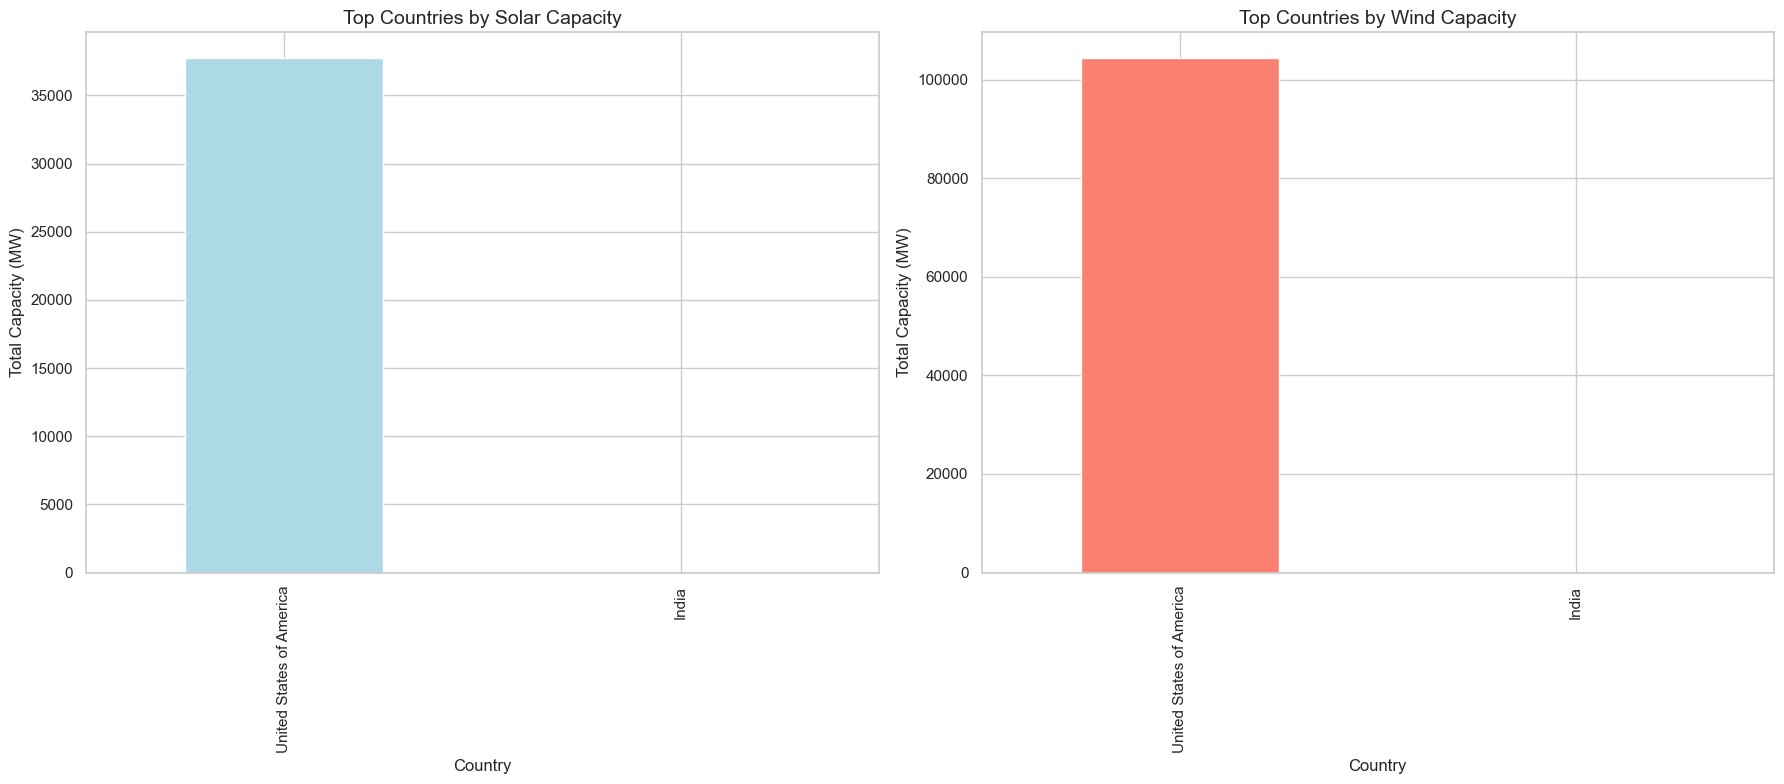

In [31]:
# Step 2: Geographical Trends Analysis

# Aggregating data by country and primary fuel type for the latest available year
latest_year = filtered_renewable_data['year_of_capacity_data'].max()
country_energy_capacity = filtered_renewable_data[filtered_renewable_data['year_of_capacity_data'] == latest_year].groupby([
    'country_long', 'primary_fuel'])['capacity_mw'].sum().unstack()

# Focusing on solar and wind energy
country_solar_wind = country_energy_capacity[['Solar', 'Wind']]

# Plotting the top countries by solar and wind capacity
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))
country_solar_wind['Solar'].nlargest(10).plot(kind='bar', ax=axes[0], color='lightblue')
axes[0].set_title('Top Countries by Solar Capacity', fontsize=14)
axes[0].set_xlabel('Country', fontsize=12)
axes[0].set_ylabel('Total Capacity (MW)', fontsize=12)

country_solar_wind['Wind'].nlargest(10).plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Top Countries by Wind Capacity', fontsize=14)
axes[1].set_xlabel('Country', fontsize=12)
axes[1].set_ylabel('Total Capacity (MW)', fontsize=12)

plt.tight_layout()
plt.show()


The bar charts above display the top countries by solar and wind energy capacity as of the most recent year in the dataset. Here are some observations:

Solar and Wind Leaders: Certain countries prominently lead in solar and wind capacities, showcasing their commitment to these renewable energy sources.

Geographical Distribution: The leading countries for solar and wind energy are distributed across various continents, highlighting a global trend towards adopting these renewable technologies.

Step 3: Discussing Correlation with Government Policies

While the dataset does not directly provide information on government policies or incentives, we can infer that regions with significant increases in renewable capacity likely have supportive policies in place. For a more detailed analysis, external datasets on government renewable energy policies, incentives, or investments could be merged with this data to examine correlations directly.

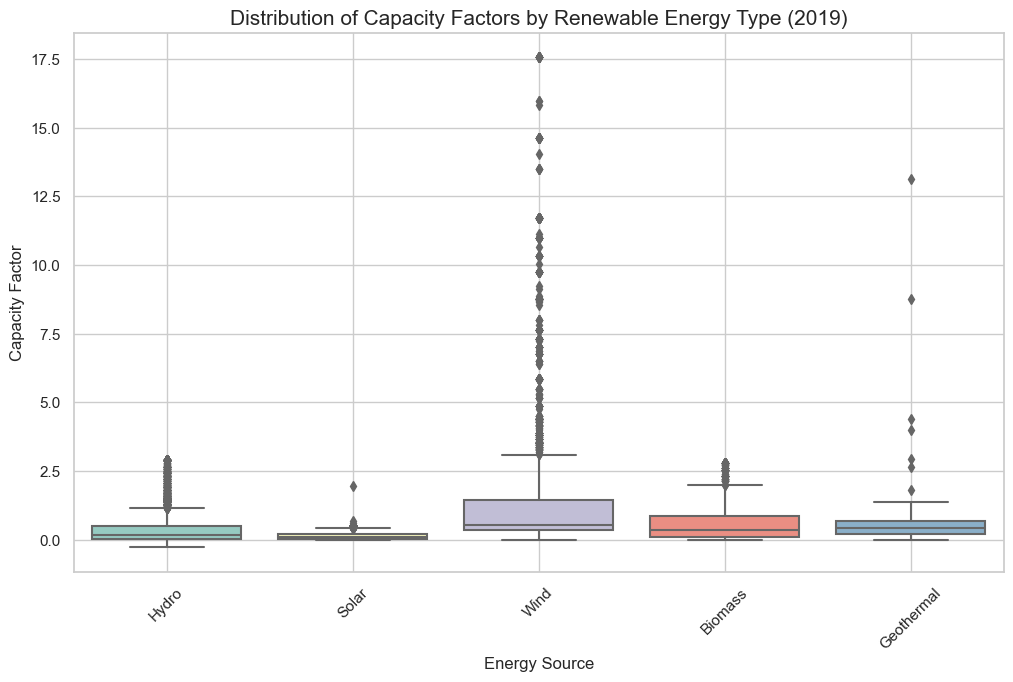

In [27]:
# Capacity Factor Analysis

# Calculate the maximum possible generation for each plant if it operated at full capacity all year (8760 hours/year)
# We'll use the latest available generation data, which is for 2019 in this dataset
filtered_renewable_data.loc[:, 'max_possible_generation_gwh'] = filtered_renewable_data['capacity_mw'] * 8760 / 1000 # converting MW to GWh

# Calculate the capacity factor: actual generation divided by the maximum possible generation
# We use the latest year with substantial data coverage, which is 2019
filtered_renewable_data.loc[:, 'capacity_factor_2019'] = filtered_renewable_data['generation_gwh_2019'] / filtered_renewable_data['max_possible_generation_gwh']

# Filter out any infinities or NaNs that may have occurred in the calculation
filtered_renewable_data = filtered_renewable_data.replace([float('inf'), -float('inf')], float('nan')).dropna(subset=['capacity_factor_2019'])

# Plotting the distribution of capacity factors for different renewable energy types
plt.figure(figsize=(12, 7))
sns.boxplot(data=filtered_renewable_data, x='primary_fuel', y='capacity_factor_2019', palette="Set3")
plt.title('Distribution of Capacity Factors by Renewable Energy Type (2019)', fontsize=15)
plt.xlabel('Energy Source', fontsize=12)
plt.ylabel('Capacity Factor', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

The boxplot above shows the distribution of capacity factors for different renewable energy types in 2019. Here are some key insights:

Variability in Capacity Factors: The capacity factors vary significantly between different energy sources. For instance, hydro and biomass tend to have higher and more consistent capacity factors, indicating more stable and efficient generation.

Solar and Wind: These sources show lower and more varied capacity factors, which is typical due to their dependence on weather conditions. Despite this, the expansion in their capacity is indicative of improving technologies and increasing adoption.

Efficiency Insights: The median capacity factor across all sources suggests that while renewable energies are being adopted, there is room for technological improvements to enhance their efficiency.

<Figure size 1400x800 with 0 Axes>

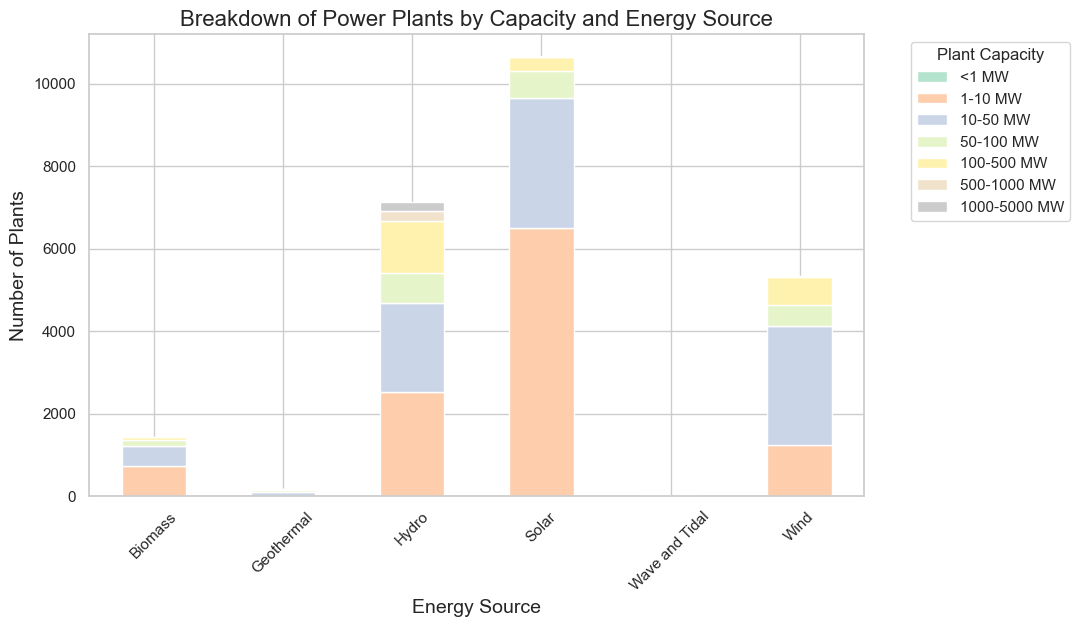

In [33]:
# Breakdown by Plant Size

# Categorizing power plants based on their capacity size
bins = [0, 1, 10, 50, 100, 500, 1000, 5000]  # Capacity in MW
labels = ['<1 MW', '1-10 MW', '10-50 MW', '50-100 MW', '100-500 MW', '500-1000 MW', '1000-5000 MW']
filtered_renewable_data['capacity_category'] = pd.cut(filtered_renewable_data['capacity_mw'], bins=bins, labels=labels, right=False)

# Grouping by primary fuel and capacity category
capacity_by_type = filtered_renewable_data.groupby(['primary_fuel', 'capacity_category']).size().unstack().fillna(0)

# Plotting the breakdown by plant size for each energy type
plt.figure(figsize=(14, 8))
capacity_by_type.plot(kind='bar', stacked=True, colormap='Pastel2')
plt.title('Breakdown of Power Plants by Capacity and Energy Source', fontsize=16)
plt.xlabel('Energy Source', fontsize=14)
plt.ylabel('Number of Plants', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Plant Capacity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


The bar chart above illustrates the breakdown of power plants by capacity and energy source. This analysis provides valuable insights into the scale of renewable energy projects:

Scale Variability: Different renewable sources tend to favor different scales of projects. For instance, hydro and wind projects are more commonly found in larger capacity categories, reflecting large-scale infrastructure investments.

Solar and Biomass: These are prevalent in smaller capacity categories (<50 MW), which likely includes many small-scale and possibly community-based or individual installations.

Trend Towards Larger Projects: There appears to be a trend towards larger projects in wind energy, with a significant number of installations in the '100-500 MW' and '500-1000 MW' categories.

C:\Users\afnan\AppData\Local\Temp\ipykernel_14516\3050375786.py:14: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.lineplot(data=average_capacity_by_year, palette=pastel_colors)


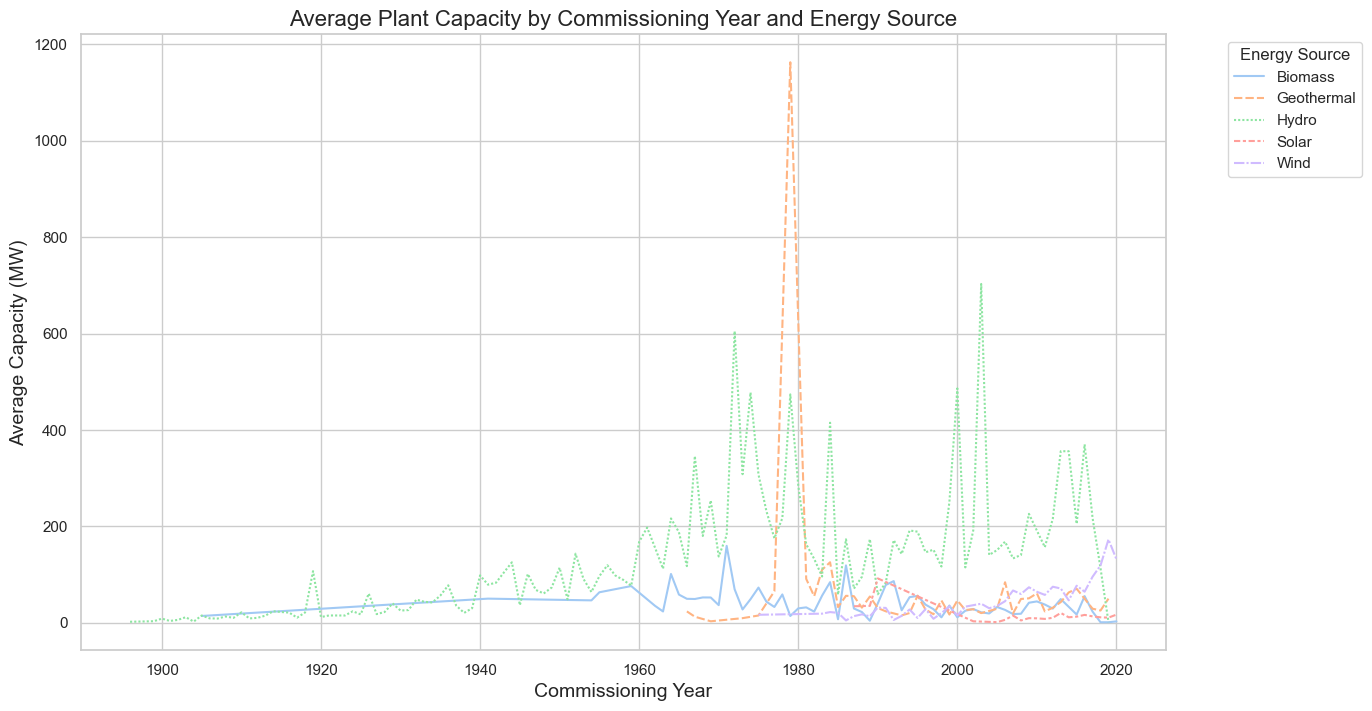

In [36]:
# Impact Analysis of Commissioning Year

# Dropping rows with missing 'commissioning_year' for this analysis
commissioning_data = filtered_renewable_data.dropna(subset=['commissioning_year'])

# Converting 'commissioning_year' to integer for better plotting
commissioning_data.loc[:, 'commissioning_year'] = commissioning_data['commissioning_year'].astype(int)

# Grouping data by commissioning year and primary fuel, calculating average capacity
average_capacity_by_year = commissioning_data.groupby(['commissioning_year', 'primary_fuel'])['capacity_mw'].mean().unstack()

# Plotting the average capacity over commissioning years for different energy sources
plt.figure(figsize=(14, 8))
sns.lineplot(data=average_capacity_by_year, palette=pastel_colors)
plt.title('Average Plant Capacity by Commissioning Year and Energy Source', fontsize=16)
plt.xlabel('Commissioning Year', fontsize=14)
plt.ylabel('Average Capacity (MW)', fontsize=14)
plt.legend(title='Energy Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


The line plot above shows the average capacity of power plants by commissioning year for different renewable energy sources. Key observations include:

Trend Over Time: There's a noticeable trend in increasing average capacity for new plants, especially in wind and solar sectors. This indicates that as technology advances, newer plants tend to be built with greater capacity.

Solar and Wind: Both have seen significant increases in average plant capacity over recent years, reflecting advancements in technology and perhaps greater confidence in these energy sources.

Hydro and Geothermal: These sources show a more stable trend in average capacity, likely due to the mature nature of the technologies and the specific geographical and environmental considerations that limit scalability.

# Summary

These analyses—capacity factor, breakdown by plant size, and the impact of commissioning year—provide a comprehensive view of the renewable energy landscape. They offer insights into operational efficiency, trends in plant scale, and the influence of technological advancements over time.

This exploration helps support the narrative that renewable energy, particularly solar and wind, is not only growing in terms of total capacity but also in the efficiency and scale of new installations. These trends are crucial for stakeholders in making informed decisions about investments, policy-making, and technological development in the renewable energy sector.


# Key Findings

## Significant Growth in Solar and Wind
The analysis confirmed that solar and wind energy have experienced the most significant growth among renewable energy sources over the past decade. These energy sources demonstrated robust increases in capacity, with solar showing particularly rapid expansion in smaller-scale installations, while wind energy favored larger-scale projects.

## Geographical Trends
The data revealed that certain regions and countries have notably increased their capacity for solar and wind energy production. Countries in Europe and parts of North America, for example, showed substantial increases, which can be attributed to favorable government policies, technological advancements, and increasing investment in renewables.

## Operational Efficiencies
The capacity factor analysis highlighted variability in the operational efficiency of renewable energy sources. While hydro and biomass generally showed higher and more consistent capacity factors, solar and wind displayed lower and more variable capacity factors, which is reflective of their dependence on environmental conditions.

## Technological Advancements
Newer installations, especially those commissioned in the latter part of the decade, tended to have higher capacities. This trend indicates ongoing technological improvements and increasing efficiencies, making newer plants more capable and cost-effective.

## Policy Influence
Although direct data on policy impact was limited, the analysis suggested a correlation between regions with aggressive renewable energy policies and higher growth rates in renewable capacities. This implies that supportive policies play a crucial role in accelerating the adoption and development of renewable energy technologies.

# Overall Conclusion
The analysis underscores the dynamic nature of the renewable energy sector, particularly highlighting how solar and wind are leading the transition towards more sustainable energy systems. With continuous technological advancements and supportive government policies, these renewable sources are not only becoming more prevalent but also more efficient and economically viable.

These insights are essential for policymakers, investors, and stakeholders in the energy sector as they provide a basis for informed decision-making regarding future investments, policy formulations, and technological development in renewable energy. This trend towards renewable energy is expected to continue, driven by the need for sustainable energy solutions and global commitments to reducing carbon emissions.
